<h1 align="center">Collecting Data via Web Scraping</h1>

## **Warning: The scraping skill in this example is only for academic purpose. Unauthorized scraping could go against the terms of use of some websites, and be in viloation of copyright laws.**

**Points to consider before starting a web scraping project:**
*   What is the purpose of this web scraping? (business or practice)
*   Does the content have copyrights? (like article, paper or pictures)
*   Could the web scraper cause the web server to become out of service?
*   Does it follow the terms of use of website?
*   Does the collected data compromise individual/organization privacy and trade secrets?  

**Reference**:[Krotov, V., & Silva, L. (2018). Legality and ethics of web scraping.](https://www.researchgate.net/profile/Vlad_Krotov/publication/324907302_Legality_and_Ethics_of_Web_Scraping/links/5aea622345851588dd8287dc/Legality-and-Ethics-of-Web-Scraping.pdf)

The website can also stop the web scraper with some [techniques](https://github.com/JonasCz/How-To-Prevent-Scraping)
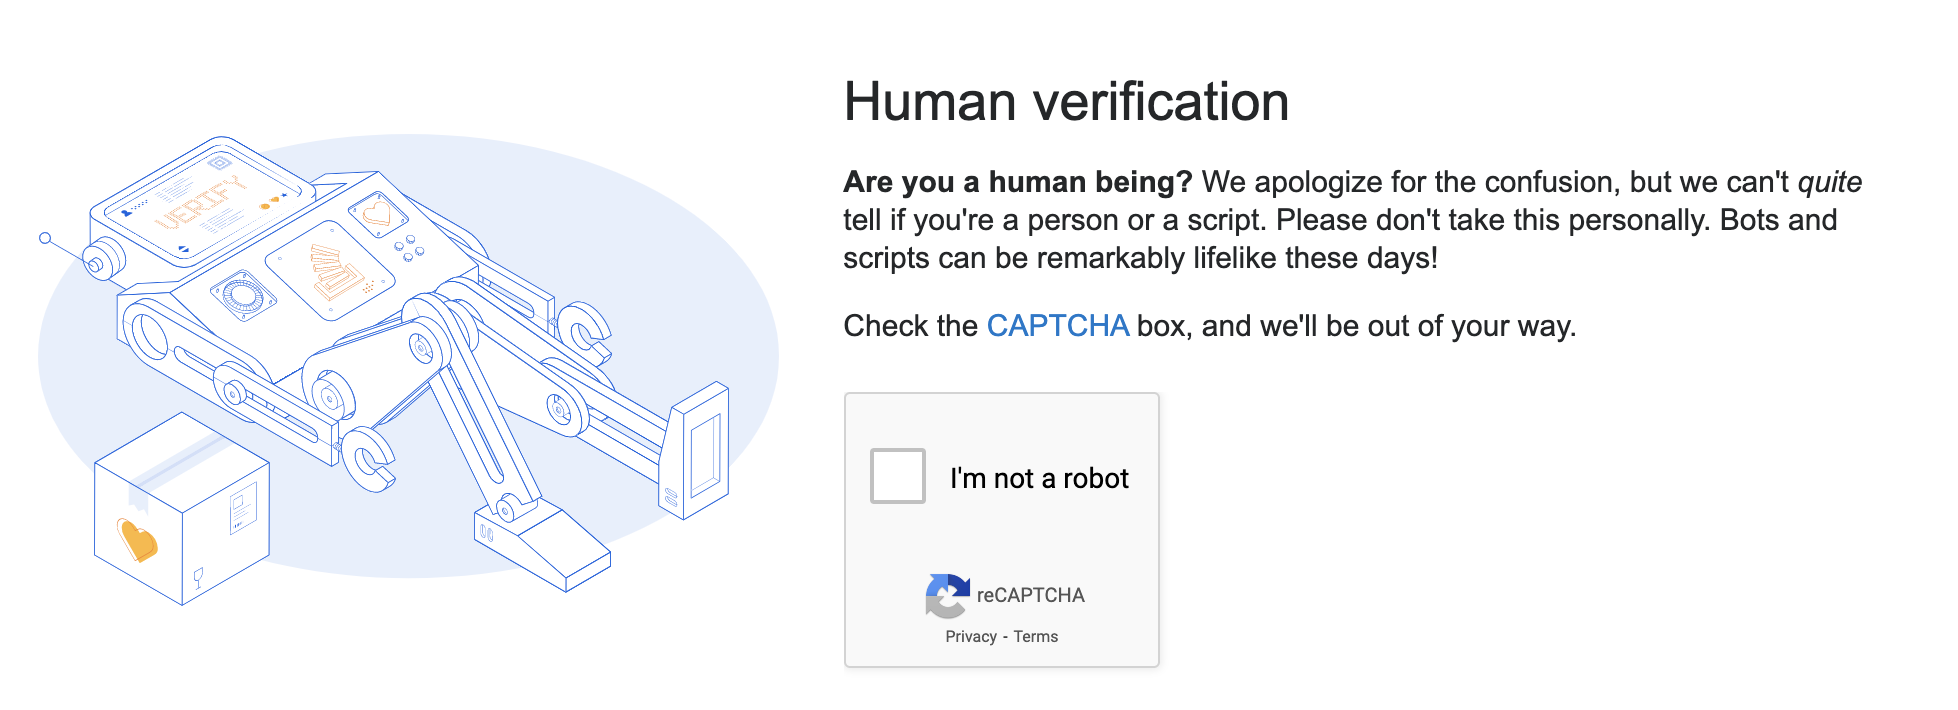

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# start page of Dollar Tree stores in Florida
start_page = "https://www.dollartree.com/locations/fl/"

# send request to Dollar Tree server and download the source code of start_page
page = requests.get(start_page)

In [ ]:
# convert the downloaded source code to a tree structure for further parsing
soup = BeautifulSoup(page.text, 'html.parser')

In [ ]:
# find all city elements and save them in a set called location_pages
location_pages = soup.findAll("a",{"class":"ga_w2gi_lp", "data-gaact":"Click_to_State_Level"})

In [ ]:
print(f'Number of cities with Dollar Tree stores: {len(location_pages)}')

Number of cities with Dollar Tree stores: 238


In [ ]:
# we use a sample of 20
sample_size = 20
sample_cities = location_pages[0:sample_size]

for page in sample_cities:
  print(page.attrs['href'])

https://www.dollartree.com/locations/fl/altamonte-springs/
https://www.dollartree.com/locations/fl/apopka/
https://www.dollartree.com/locations/fl/arcadia/
https://www.dollartree.com/locations/fl/atlantic-beach/
https://www.dollartree.com/locations/fl/auburndale/
https://www.dollartree.com/locations/fl/avon-park/
https://www.dollartree.com/locations/fl/bartow/
https://www.dollartree.com/locations/fl/belleview/
https://www.dollartree.com/locations/fl/beverly-hills/
https://www.dollartree.com/locations/fl/boca-raton/
https://www.dollartree.com/locations/fl/bonita-springs/
https://www.dollartree.com/locations/fl/boynton-beach/
https://www.dollartree.com/locations/fl/bradenton/
https://www.dollartree.com/locations/fl/brandon/
https://www.dollartree.com/locations/fl/brooksville/
https://www.dollartree.com/locations/fl/bushnell/
https://www.dollartree.com/locations/fl/callaway/
https://www.dollartree.com/locations/fl/cape-coral/
https://www.dollartree.com/locations/fl/casselberry/
https://ww

In [ ]:
# extract the web link of these sample cities in cities_pages list
cities_pages = [page.attrs['href'] for page in sample_cities]

In [ ]:
# scrap the web pages of these sample cities and save all source code of 20 web pages 
# in a list called sample_page_contents
sample_page_contents = []
for sample_city in cities_pages:
  print(sample_city)
  sample_city_page = requests.get(sample_city)
  sample_page_contents.append(sample_city_page)

https://www.dollartree.com/locations/fl/altamonte-springs/
https://www.dollartree.com/locations/fl/apopka/
https://www.dollartree.com/locations/fl/arcadia/
https://www.dollartree.com/locations/fl/atlantic-beach/
https://www.dollartree.com/locations/fl/auburndale/
https://www.dollartree.com/locations/fl/avon-park/
https://www.dollartree.com/locations/fl/bartow/
https://www.dollartree.com/locations/fl/belleview/
https://www.dollartree.com/locations/fl/beverly-hills/
https://www.dollartree.com/locations/fl/boca-raton/
https://www.dollartree.com/locations/fl/bonita-springs/
https://www.dollartree.com/locations/fl/boynton-beach/
https://www.dollartree.com/locations/fl/bradenton/
https://www.dollartree.com/locations/fl/brandon/
https://www.dollartree.com/locations/fl/brooksville/
https://www.dollartree.com/locations/fl/bushnell/
https://www.dollartree.com/locations/fl/callaway/
https://www.dollartree.com/locations/fl/cape-coral/
https://www.dollartree.com/locations/fl/casselberry/
https://ww

We iterate over the source code of each city web page to find the store elements. Ater that, we extract the store address from these store elements one by one.

In [ ]:
# create a list to save all store addresses
store_locations = []
# iterate the content of each web page for each city
for sample_city in sample_page_contents:
  # convert source code to tree structure for further parsing
  sample_city_soup = BeautifulSoup(sample_city.text, 'html.parser')
  # select the store elements via <span> tag, class, data-gaact attributes
  raw_store_address = sample_city_soup.findAll("span",{"class":"underline ga_w2gi_lp","data-gaact":"Click_to_City_Level_Store_Locator"} )
  # extract precise address of each store in each city and save in store_locations
  for store in raw_store_address:
    store_locations.append(store.attrs["data-galoc"])

In [ ]:
store_locations

['Altamonte Springs - 945 West Sr 436 Suite 1145, Wekiva Square, Altamonte Springs, Fl, 32714',
 'Apopka - 1560 W Orange Blossom Trail, Apopka Commons, Apopka, Fl, 32712',
 'Apopka - 769 South Orange Blossom Trail, Apopka Land Regional Shopping Center, Apopka, Fl, 32703',
 'Arcadia - 1411 E Oak St, Desoto Plaza, Arcadia, Fl, 34266',
 'Atlantic Beach - 2321 Mayport Rd., Mayport Fs, Atlantic Beach, Fl, 32233',
 'Atlantic Beach - 989 Atlantic Blvd Suite B, Atlantic Village Shopping Center, Atlantic Beach, Fl, 32233',
 'Auburndale - 2389 Us Hwy 92 W, Aurburndale, Auburndale, Fl, 33823',
 'Avon Park - 1028 Us Highway 27 S., Highlands Plaza, Avon Park, Fl, 33825',
 'Bartow - 1370 N Broadway Ave, Badcock Plaza, Bartow, Fl, 33830',
 'Belleview - 10369 Se Us Hwy 441, Belleview Regional Shopping Center, Belleview, Fl, 34420',
 'Beverly Hills - 3485 N. Lecanto Highway, 3485 N Lecanto Highway, Beverly Hills, Fl, 34465',
 'Boca Raton - 1616 N. Federal Hwy, The Rag Shop Center, Boca Raton, Fl, 33432

In [ ]:
# split each address by " - " and save it within a list
store_in_city = []
for location in store_locations:
  city_store_pair = location.split(" - ")
  store_in_city.append(city_store_pair)

In [ ]:
store_in_city[:5]

[['Altamonte Springs',
  '945 West Sr 436 Suite 1145, Wekiva Square, Altamonte Springs, Fl, 32714'],
 ['Apopka', '1560 W Orange Blossom Trail, Apopka Commons, Apopka, Fl, 32712'],
 ['Apopka',
  '769 South Orange Blossom Trail, Apopka Land Regional Shopping Center, Apopka, Fl, 32703'],
 ['Arcadia', '1411 E Oak St, Desoto Plaza, Arcadia, Fl, 34266'],
 ['Atlantic Beach', '2321 Mayport Rd., Mayport Fs, Atlantic Beach, Fl, 32233']]

In [ ]:
# save data into a csv file
import csv
csv_header = ['City', 'Address']
with open("DollarTreeStoreAddress.csv","w") as f:
    write = csv.writer(f) 

    write.writerow(csv_header) 
    write.writerows(store_in_city) 

<h1 align="center">Map API Visualization</h1>

Based on the store address saved in store_in_city, we try to plot these store on a map. To find the precise positions on the map, we need the help of GPS coordinates (longitude and latitude) of each store.

So we use a map API to convert post address of a store to GPS coordiantes and then plot them on the map. 

Here I use [Mapbox API ](https://docs.mapbox.com/api/overview/)for coordinates converting and plotting.

In [ ]:
!pip install geocoder

     |████████████████████████████████| 102kB 3.8MB/s 


In [ ]:
import geocoder
import re

In [ ]:
API_token = "Token"

In [ ]:
# save all stores' longitude
longitude_list = []
# save all stores' latitude
latitude_list = []
# save all stores' post address
address_list = []

# convert post address to coordinates
for city_address_pair in store_in_city:
  address = city_address_pair[1]
  address = re.sub('[*#/_]', '', address)
  # submit post address to MapBox API
  g = geocoder.mapbox(address, key= API_token)
  # returned coordiantes are saved in lists
  latitude, longitude = g.latlng
  longitude_list.append(longitude)
  latitude_list.append(latitude)
  address_list.append(address)

print("Coverting Complete!")

Coverting Complete!


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox( lat=latitude_list, lon=longitude_list, hover_name=address_list,
                        color_discrete_sequence=["fuchsia"], zoom=5, height=600)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

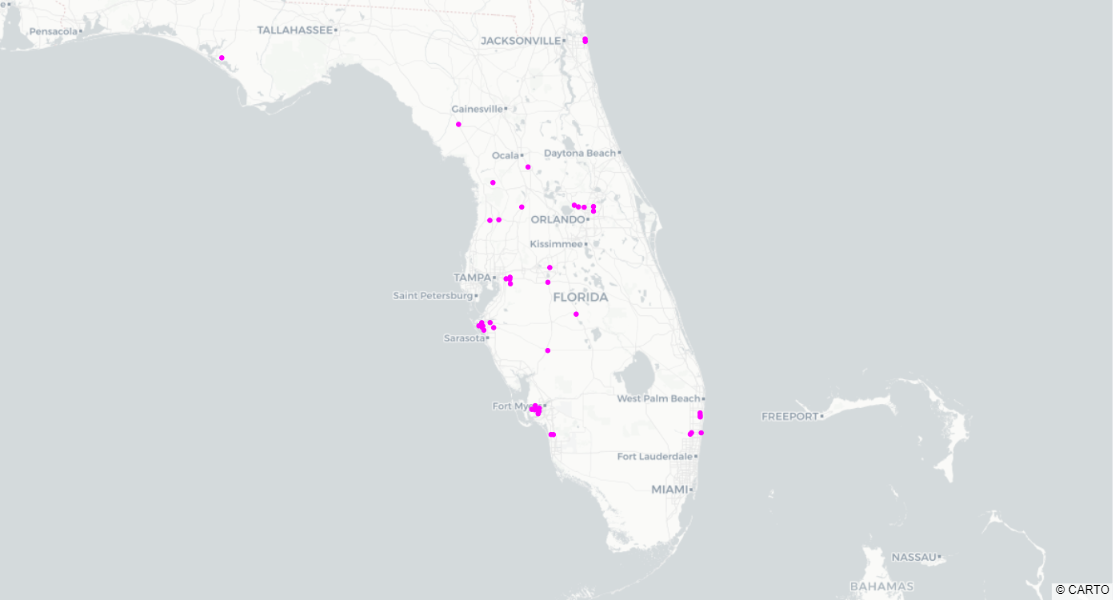

In [ ]:
# change a map style
fig = px.scatter_mapbox( lat=latitude_list, lon=longitude_list, hover_name=address_list,
                        color_discrete_sequence=["fuchsia"], zoom=5, height=600)
fig.update_layout(mapbox_style="satellite-streets", mapbox_accesstoken=API_token)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

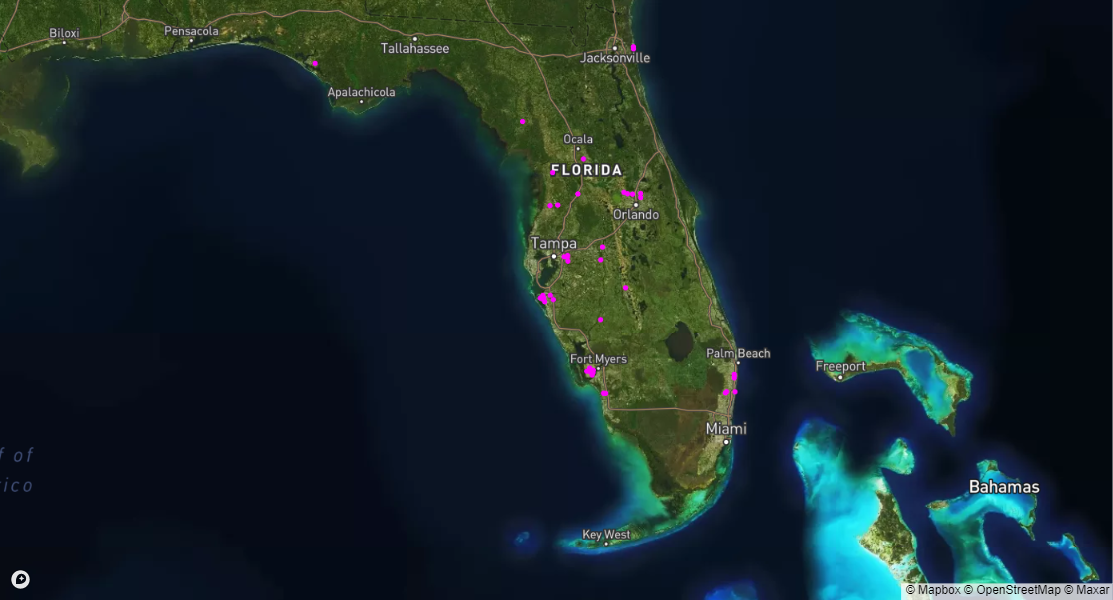

You can change ```mapbox_style``` to view more style maps.

* The accepted values for layout.mapbox.style are one of:
"white-bg" yields an empty white canvas which results in no external HTTP requests

* "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor" yeild maps composed of raster tiles from various public tile servers which do not require signups or access tokens

* "basic", "streets", "outdoors", "light", "dark", "satellite", or "satellite-streets" yeild maps composed of vector tiles from the Mapbox service, and do require a Mapbox Access Token or an on-premise Mapbox installation.
